- Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/
- Código realizado por: Enrique V. Mattos - 07/04/2024

# **1° Passo:** Instalando as bibliotecas

In [1]:
!pip install -q proplot calplot

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

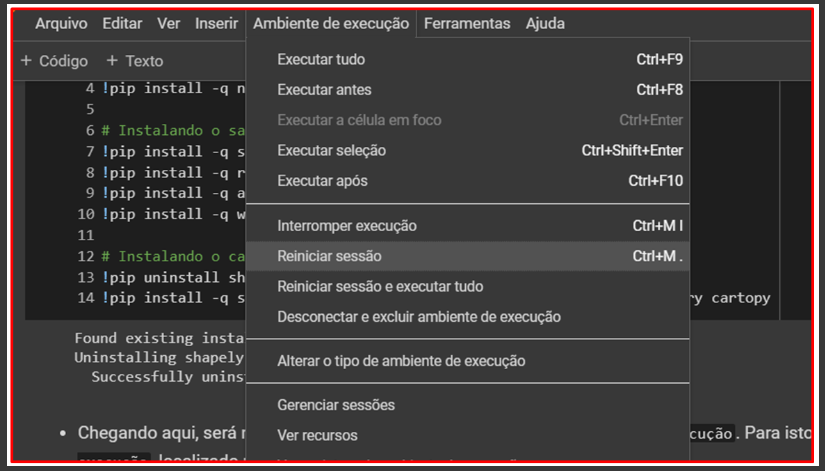

# **2° Passo:** Importando bibliotecas

In [2]:
import numpy as np
import proplot as pplt
import matplotlib.pyplot as plt
import pandas as pd
import calplot
import time
from zipfile import ZipFile


# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


#Leitura dos dados de focos de calor

Período de dados

In [3]:
anos = [2020, 2021, 2022, 2023]

Baixando os dados

In [4]:
for ano in anos:

    # baixando arquivos
    filename = f'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_{ano}.zip'
    !wget {filename}

    # descompactando arquivo ZIP
    with ZipFile(f"/content/focos_br_mg_ref_{ano}.zip", 'r') as zObject:

        # extraindo os membros do arquivo ZIP para uma localicação específica
        zObject.extractall(path='/content')

--2024-04-07 22:32:18--  https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_2020.zip
Resolving dataserver-coids.inpe.br (dataserver-coids.inpe.br)... 150.163.218.16
Connecting to dataserver-coids.inpe.br (dataserver-coids.inpe.br)|150.163.218.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348874 (341K) [application/zip]
Saving to: ‘focos_br_mg_ref_2020.zip’

focos_br_mg_ref_202 100%[===================>] 340.70K   670KB/s    in 0.5s    

2024-04-07 22:32:20 (670 KB/s) - ‘focos_br_mg_ref_2020.zip’ saved [348874/348874]

--2024-04-07 22:32:20--  https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_2021.zip
Resolving dataserver-coids.inpe.br (dataserver-coids.inpe.br)... 150.163.218.16
Connecting to dataserver-coids.inpe.br (dataserver-coids.inpe.br)|150.163.218.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500181 (488K) [

In [5]:
# exemplo dos dados
df_ano1 = pd.read_csv(f'/content/focos_br_mg_ref_{anos[0]}.csv')
df_ano1.head(2)

,id_bdq,foco_id,lat,lon,data_pas,pais,estado,municipio,bioma
0,1520617569,dbdc88bf-0798-36d5-aeea-bb8200bff313,-18.167,-44.624,2020-11-27 16:30:00,Brasil,MINAS GERAIS,CORINTO,Cerrado
1,1520617654,35cc87df-5c74-3d75-b81e-398ae21534ef,-18.254,-47.244,2020-11-27 16:30:00,Brasil,MINAS GERAIS,COROMANDEL,Cerrado


Lendo os dados

In [6]:
%%time
# leitura dos dados
df_ano1 = pd.read_csv(f'/content/focos_br_mg_ref_{anos[0]}.csv')
df_ano2 = pd.read_csv(f'/content/focos_br_mg_ref_{anos[1]}.csv')
df_ano3 = pd.read_csv(f'/content/focos_br_mg_ref_{anos[2]}.csv')
df_ano4 = pd.read_csv(f'/content/focos_br_mg_ref_{anos[3]}.csv')

# transforma a coluna "datahora" para o formato "datetime"
df_ano1['data_pas'] = pd.to_datetime(df_ano1['data_pas'])
df_ano2['data_pas'] = pd.to_datetime(df_ano2['data_pas'])
df_ano3['data_pas'] = pd.to_datetime(df_ano3['data_pas'])
df_ano4['data_pas'] = pd.to_datetime(df_ano4['data_pas'])

# seta a coluna "datahora" como o índice da tabela
df_ano1.set_index('data_pas', inplace=True)
df_ano2.set_index('data_pas', inplace=True)
df_ano3.set_index('data_pas', inplace=True)
df_ano4.set_index('data_pas', inplace=True)

# mostra a tabela
df_ano4

CPU times: user 156 ms, sys: 31.5 ms, total: 188 ms
Wall time: 215 ms


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2023-01-03 16:15:00,1615095687,060bfb11-d427-34a3-b49e-e8d8ff4ab225,-17.54764,-40.59286,Brasil,MINAS GERAIS,CARLOS CHAGAS,Mata Atlântica
2023-01-17 16:20:00,1616743287,514473c1-131e-3190-b4a2-3f0074eac3c6,-21.87560,-43.82939,Brasil,MINAS GERAIS,LIMA DUARTE,Mata Atlântica
2023-01-17 16:22:00,1616743303,3c2183d6-fe1a-369a-bca6-ce8f1b3c8d51,-15.37085,-42.55444,Brasil,MINAS GERAIS,SANTO ANTÔNIO DO RETIRO,Cerrado
2023-01-17 16:22:00,1616743308,3bada73e-821d-3684-968d-30507d54a1e8,-15.43887,-43.17031,Brasil,MINAS GERAIS,PAI PEDRO,Caatinga
2023-01-17 16:22:00,1616743322,8994e920-6035-370b-a9b6-0110dc719029,-15.44435,-43.18102,Brasil,MINAS GERAIS,PAI PEDRO,Caatinga
...,...,...,...,...,...,...,...,...
2023-12-30 16:39:00,1665902606,36d3a881-ca0b-3311-abed-a00ff04436d4,-15.83325,-40.43346,Brasil,MINAS GERAIS,JORDÂNIA,Mata Atlântica
2023-12-30 16:39:00,1665902607,54f544b7-3d68-313e-83a5-f2b8c73720a5,-15.80780,-41.98963,Brasil,MINAS GERAIS,TAIOBEIRAS,Mata Atlântica
2023-12-30 16:39:00,1665902608,93feaecf-ba30-3027-a30d-23b8f6c684d2,-15.80602,-41.97527,Brasil,MINAS GERAIS,TAIOBEIRAS,Mata Atlântica


#Agrupando os dados por dia

In [7]:
%%time
# agrupa os dados por dia
df_ano1_dia = df_ano1.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_ano2_dia = df_ano2.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_ano3_dia = df_ano3.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_ano4_dia = df_ano4.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']

# mostra os dados
df_ano1_dia

CPU times: user 80.3 ms, sys: 2.84 ms, total: 83.1 ms
Wall time: 153 ms


data_pas
2020-01-01     1
2020-01-02     0
2020-01-03     1
2020-01-04     0
2020-01-05     1
              ..
2020-12-27     1
2020-12-28     0
2020-12-29     1
2020-12-30     0
2020-12-31    13
Freq: D, Name: estado, Length: 366, dtype: int64

In [8]:
np.sum(df_ano1_dia.values)

8737

#Plota figura

Vamos plotar uma figura que mostra a distrbuição de ocorrência de focos de calor por `dia da semana` e `mês`. Para isto usaremos a biblioteca [calplot](https://calplot.readthedocs.io/en/latest/).

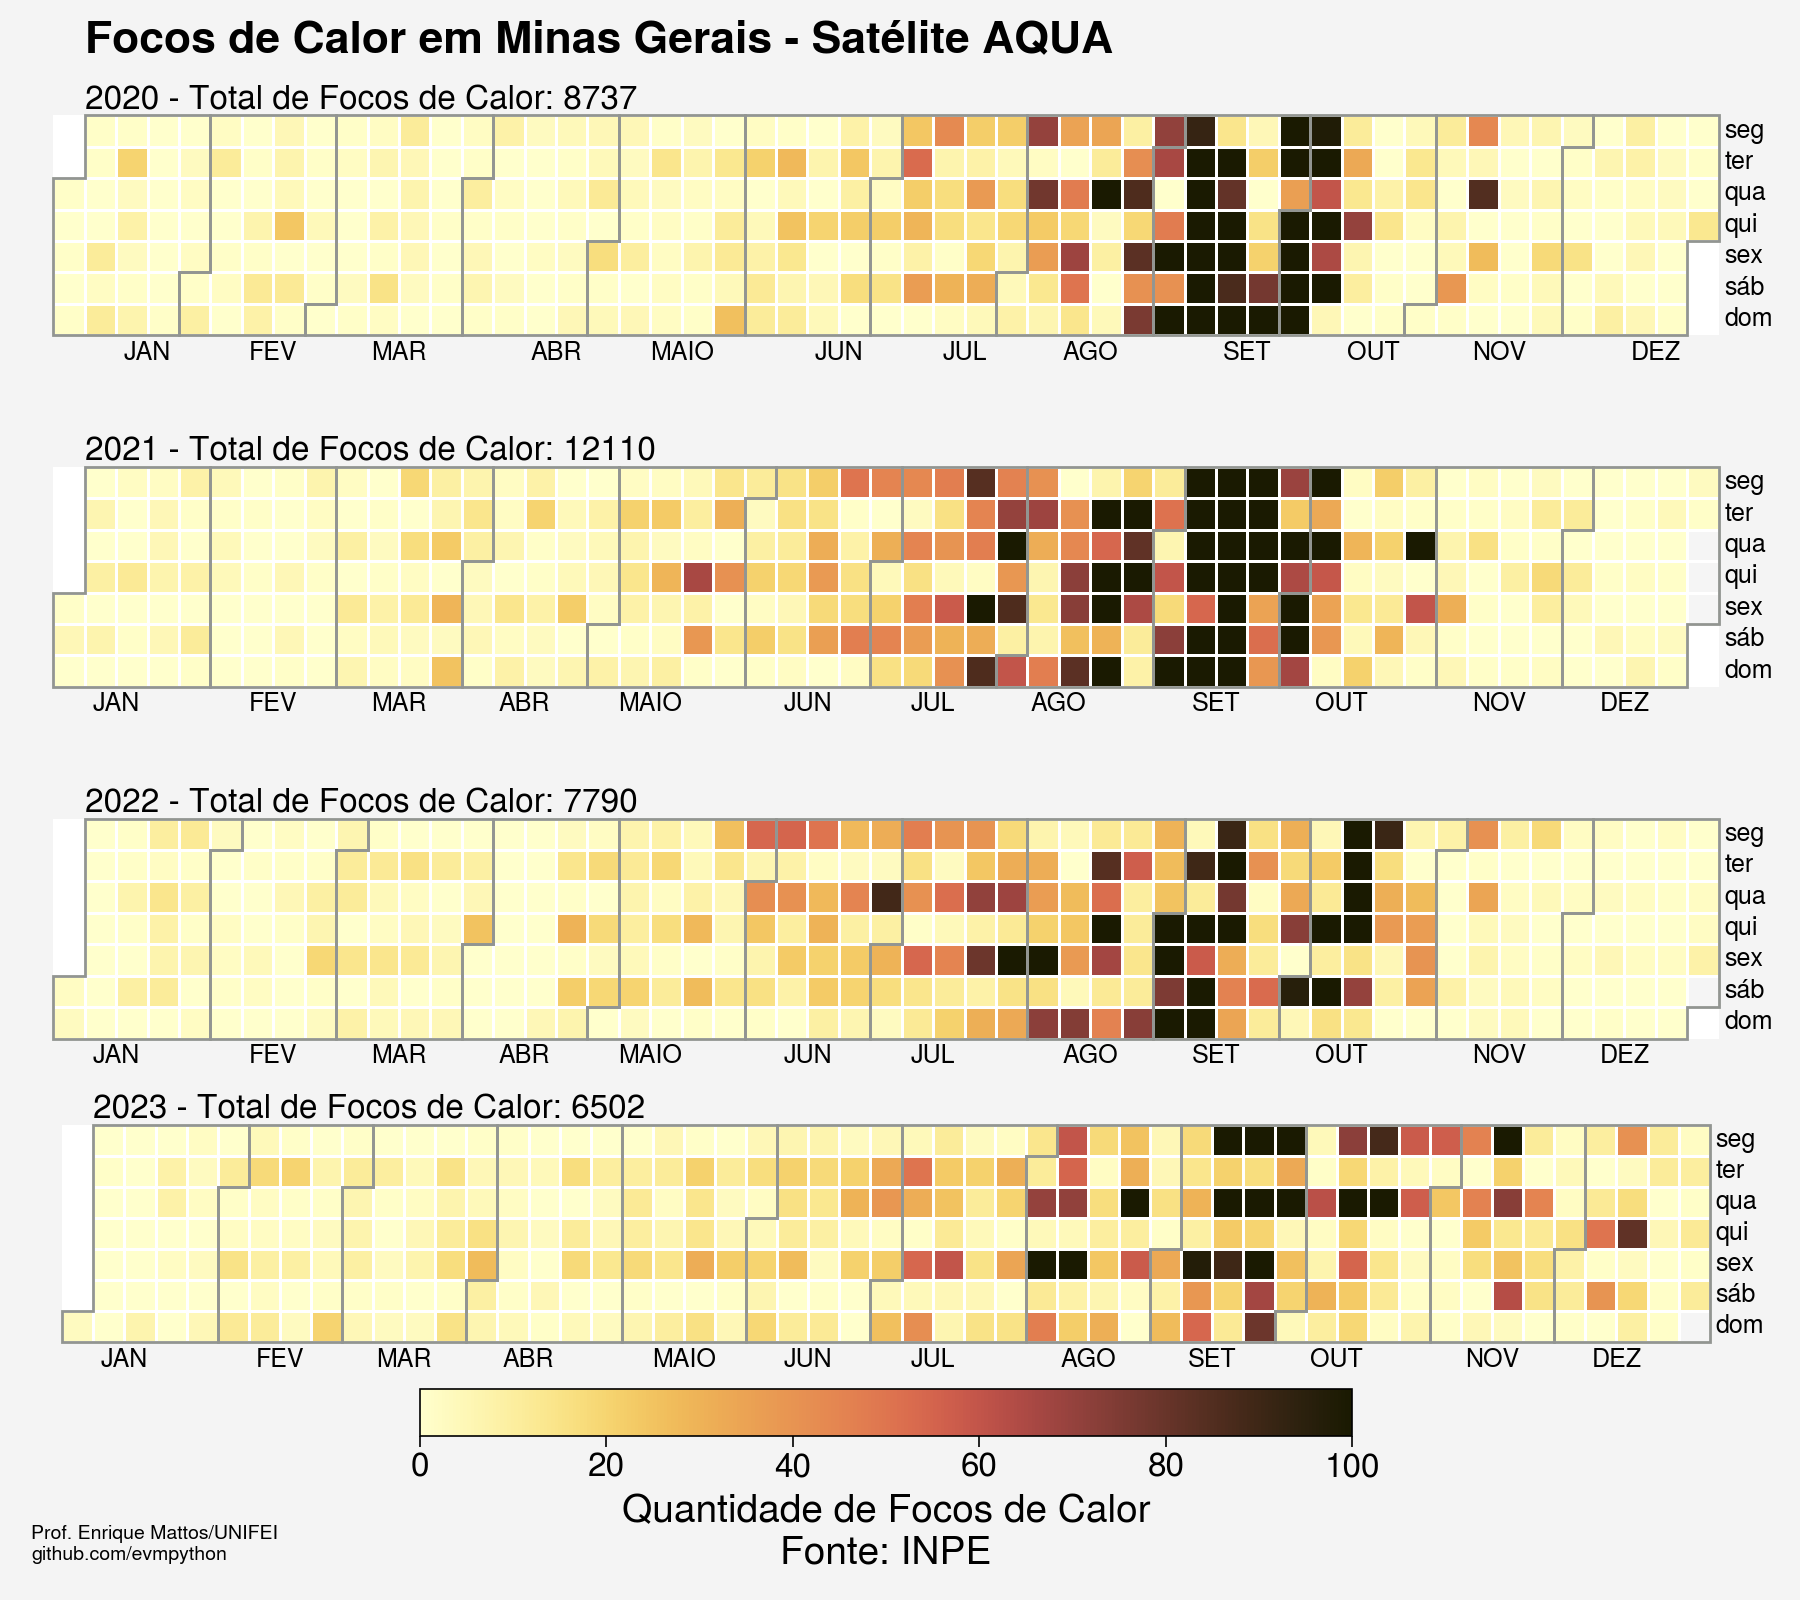

CPU times: user 3.39 s, sys: 203 ms, total: 3.59 s
Wall time: 4.92 s


In [9]:
%%time
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(9,8), nrows=4)

# labels dos "dias da semana" e "meses do ano"
dias = ['seg', 'ter', 'qua', 'qui', 'sex','sáb', 'dom']
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAIO', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

#========================================================#
#                 FIGURA A) - 2017
#========================================================#
map1 = calplot.yearplot(df_ano1_dia,
                        cmap='lajolla',
                        daylabels=dias,
                        monthlabels=meses,
                        vmin=0,
                        vmax=100,
                        ax=ax[0])

#========================================================#
#                  FIGURA B) - 2018
#========================================================#
calplot.yearplot(df_ano2_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[1])

#========================================================#
#                  FIGURA C) - 2019
#========================================================#
calplot.yearplot(df_ano3_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[2])

#========================================================#
#                  FIGURA D) - 2020
#========================================================#
calplot.yearplot(df_ano4_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[3])

#========================================================#
#                  DEMAIS DEFINIÇÕES
#========================================================#
# barra de cores
cb = fig.colorbar(map1.get_children()[1],
                  orientation='horizontal',
                  ticks=pplt.arange(0, 100, 20),
                  shrink=0.75,
                  ax=ax[3])

cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='minor', width=0)
cb.set_label('Quantidade de Focos de Calor\nFonte: INPE', fontsize=14)

# textos
ax[0].text(1., 9., 'Focos de Calor em Minas Gerais - Satélite AQUA', fontsize=16, color='black', fontweight='bold')
ax[0].text(1., 7.2, f'{anos[0]} - Total de Focos de Calor: {np.sum(df_ano1_dia.values)}', fontsize=12, color='black')
ax[1].text(1., 7.2, f'{anos[1]} - Total de Focos de Calor: {np.sum(df_ano2_dia.values)}', fontsize=12, color='black')
ax[2].text(1., 7.2, f'{anos[2]} - Total de Focos de Calor: {np.sum(df_ano3_dia.values)}', fontsize=12, color='black')
ax[3].text(1., 7.2, f'{anos[3]} - Total de Focos de Calor: {np.sum(df_ano4_dia.values)}', fontsize=12, color='black')

# informação na figura
ax[3].text(-1, -7., 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black')

# salva figura
plt.tight_layout()
plt.savefig('calendar_plot.jpg', bbox_inches='tight', dpi=300)
plt.show()